In [ ]:
#@title Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from ipywidgets import interact, interactive, fixed, IntSlider, Play, jslink, HBox, interactive_output
from matplotlib.cm import get_cmap
import imageio
import os
from IPython.display import Image
from skimage import measure

In [ ]:
def plot_trajectories(df, plot_type='both', figsize=(12, 6), x_range=None, y_range=None, z_range=None, show_legend=True):
    if 'Cell_ID' in df.columns:
        elements_to_group = ['Cell_ID', 'particle']
    else:
        elements_to_group = 'particle'
    # function to plot the trajectories
    fig = plt.figure(figsize=figsize)
    if plot_type == '3d' or plot_type == 'both':
        ax3d = fig.add_subplot(141, projection='3d')  # 3D plot
        for particle, group in df.groupby(elements_to_group):
            ax3d.plot(group['x'], group['y'], group['z'], label=f'Particle {particle}')
            ax3d.scatter(group['x'].iloc[0], group['y'].iloc[0], group['z'].iloc[0], color='k', marker='s', s=2)  # Square marker at the start
        ax3d.set_xlabel('X')
        ax3d.set_ylabel('Y')
        ax3d.set_zlabel('Z')
        ax3d.set_title('Trajectories of Particles (3D)')
        if not x_range is None:
            ax3d.set_xlim(x_range)
        if not y_range is None:
            ax3d.set_ylim(y_range)
        if not z_range is None:
            ax3d.set_zlim(z_range)
        if show_legend:
            ax3d.legend()
    if plot_type == '2d' or plot_type == 'both':
        ax2d_xy = fig.add_subplot(142, aspect='equal')  # XY projection
        ax2d_xz = fig.add_subplot(143, aspect='equal')  # XZ projection
        ax2d_yz = fig.add_subplot(144, aspect='equal')  # YZ projection
        for particle, group in df.groupby(elements_to_group):
            ax2d_xy.plot(group['x'], group['y'], label=f'Particle {particle}')
            ax2d_xz.plot(group['x'], group['z'], label=f'Particle {particle}')
            ax2d_yz.plot(group['y'], group['z'], label=f'Particle {particle}')
            ax2d_xy.scatter(group['x'].iloc[0], group['y'].iloc[0], color='k', marker='s', s=2)  # Square marker at the start
            ax2d_xz.scatter(group['x'].iloc[0], group['z'].iloc[0], color='k', marker='s', s=2)  # Square marker at the start
            ax2d_yz.scatter(group['y'].iloc[0], group['z'].iloc[0], color='k', marker='s', s=2)  # Square marker at the start
        ax2d_xy.set_xlabel('X')
        ax2d_xy.set_ylabel('Y')
        ax2d_xy.set_title('Trajectories of Particles (XY Projection)')
        ax2d_xz.set_xlabel('X')
        ax2d_xz.set_ylabel('Z')
        ax2d_xz.set_title('Trajectories of Particles (XZ Projection)')
        ax2d_yz.set_xlabel('Y')
        ax2d_yz.set_ylabel('Z')
        ax2d_yz.set_title('Trajectories of Particles (YZ Projection)')
        if not x_range is None:
            ax2d_xy.set_xlim(x_range)
            ax2d_xz.set_xlim(x_range)
        if not y_range is None:
            ax2d_xy.set_ylim(y_range)
            ax2d_yz.set_xlim(y_range)
        if not z_range is None:
            ax2d_xz.set_ylim(z_range)
            ax2d_yz.set_ylim(z_range)
        if show_legend:
            ax2d_xy.legend()
            ax2d_xz.legend()
            ax2d_yz.legend()
        # inverting axis for 2d projections
        ax2d_xy.invert_yaxis() 
        ax2d_xz.invert_yaxis()
        ax2d_yz.invert_yaxis()
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_particle_positions(df, time_point, second_time_point=None, plot_type='both', figsize=(12, 6), x_range=None, y_range=None, z_range=None, show_legend=True):
    if 'Cell_ID' in df.columns:
        elements_to_group = ['Cell_ID', 'particle']
    else:
        elements_to_group = 'particle'
    if plot_type == '3d' or plot_type == 'both':
        fig = plt.figure(figsize=figsize)
        ax3d = fig.add_subplot(141, projection='3d')  # 3D plot
        for particle, group in df.groupby(elements_to_group):
            position_at_time_point = group[group['frame'] == time_point]
            ax3d.scatter(position_at_time_point['x'], position_at_time_point['y'], position_at_time_point['z'], color='blue', label=f'Particle {particle}', s=2)
            if second_time_point is not None:
                position_at_second_time_point = group[group['frame'] == second_time_point]
                ax3d.scatter(position_at_second_time_point['x'], position_at_second_time_point['y'], position_at_second_time_point['z'], color='red', label=f'Particle {particle}', s=2)
        ax3d.set_xlabel('X')
        ax3d.set_ylabel('Y')
        ax3d.set_zlabel('Z')
        ax3d.set_title('Particle Positions at Time Point (3D)')
        if not x_range is None:
            ax3d.set_xlim(x_range)
        if not y_range is None:
            ax3d.set_ylim(y_range)
        if not z_range is None:
            ax3d.set_zlim(z_range)
        if show_legend:
            ax3d.legend()
    if plot_type == '2d' or plot_type == 'both':
        if plot_type == 'both':
            ax2d_xy = fig.add_subplot(142, aspect='equal')  # XY projection
            ax2d_xz = fig.add_subplot(143, aspect='equal')  # XZ projection
            ax2d_yz = fig.add_subplot(144, aspect='equal')  # YZ projection
        else:
            fig = plt.figure(figsize=figsize)
            ax2d_xy = fig.add_subplot(141, aspect='equal')  # XY projection
            ax2d_xz = fig.add_subplot(142, aspect='equal')  # XZ projection
            ax2d_yz = fig.add_subplot(143, aspect='equal')  # YZ projection
        for particle, group in df.groupby(elements_to_group):
            position_at_time_point = group[group['frame'] == time_point]
            ax2d_xy.scatter(position_at_time_point['x'], position_at_time_point['y'], color='blue', label=f'Particle {particle}', s=2)
            ax2d_xz.scatter(position_at_time_point['x'], position_at_time_point['z'], color='blue', label=f'Particle {particle}', s=2)
            ax2d_yz.scatter(position_at_time_point['y'], position_at_time_point['z'], color='blue', label=f'Particle {particle}', s=2)
            if second_time_point is not None:
                position_at_second_time_point = group[group['frame'] == second_time_point]
                ax2d_xy.scatter(position_at_second_time_point['x'], position_at_second_time_point['y'], color='red', label=f'Particle {particle}', s=2)
                ax2d_xz.scatter(position_at_second_time_point['x'], position_at_second_time_point['z'], color='red', label=f'Particle {particle}', s=2)
                ax2d_yz.scatter(position_at_second_time_point['y'], position_at_second_time_point['z'], color='red', label=f'Particle {particle}', s=2)
        ax2d_xy.set_xlabel('X')
        ax2d_xy.set_ylabel('Y')
        ax2d_xy.set_title('Particle Positions at Time Point (XY Projection)')
        ax2d_xz.set_xlabel('X')
        ax2d_xz.set_ylabel('Z')
        ax2d_xz.set_title('Particle Positions at Time Point (XZ Projection)')
        ax2d_yz.set_xlabel('Y')
        ax2d_yz.set_ylabel('Z')
        ax2d_yz.set_title('Particle Positions at Time Point (YZ Projection)')
        if not x_range is None:
            ax2d_xy.set_xlim(x_range)
            ax2d_xz.set_xlim(x_range)
        if not y_range is None:
            ax2d_xy.set_ylim(y_range)
            ax2d_yz.set_xlim(y_range)
        if not z_range is None:
            ax2d_xz.set_ylim(z_range)
            ax2d_yz.set_ylim(z_range)
        if show_legend:
            ax2d_xy.legend()
            ax2d_xz.legend()
            ax2d_yz.legend()
        # inverting axis for 2d projections
        ax2d_xy.invert_yaxis() 
        ax2d_xz.invert_yaxis()
        ax2d_yz.invert_yaxis()
        
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_masks_3D(cell_masks_small, cell_masks_large):
    # function to plot the 3D masks, the 3D array has shape [X,Y,Z]. To plot as 2D images, we need to take the maximum projection along all axis. 
    # To plot as image, the transpose of the array is taken to have the correct orientation.
    if cell_masks_small.ndim == 3 and cell_masks_large.ndim == 3:  # Check if 3D arrays are passed
        fig, axes = plt.subplots(2, 3, figsize=(10, 8))
        # Plot XY projection for cell_masks_small
        axes[0, 0].imshow(np.max(cell_masks_small, axis=2).T, cmap='gray', origin='upper')
        axes[0, 0].set_title('XY Projection - Smaller Sphere')
        axes[0, 0].set_xlabel('X')
        axes[0, 0].set_ylabel('Y')
        axes[0, 0].set_aspect('equal')
        # Plot XZ projection for cell_masks_small
        axes[0, 1].imshow(np.max(cell_masks_small, axis=1).T, cmap='gray', origin='upper')
        axes[0, 1].set_title('XZ Projection - Smaller Sphere')
        axes[0, 1].set_xlabel('X')
        axes[0, 1].set_ylabel('Z')
        axes[0, 1].set_aspect('equal')
        # Plot YZ projection for cell_masks_small
        axes[0, 2].imshow(np.max(cell_masks_small, axis=0).T, cmap='gray', origin='upper')
        axes[0, 2].set_title('YZ Projection - Smaller Sphere')
        axes[0, 2].set_xlabel('Y')
        axes[0, 2].set_ylabel('Z')
        axes[0, 2].set_aspect('equal')
        # Plot XY projection for cell_masks_large
        axes[1, 0].imshow(np.max(cell_masks_large, axis=2).T, cmap='gray', origin='upper')
        axes[1, 0].set_title('XY Projection - Larger Sphere')
        axes[1, 0].set_xlabel('X')
        axes[1, 0].set_ylabel('Y')
        axes[1, 0].set_aspect('equal')
        # Plot XZ projection for cell_masks_large
        axes[1, 1].imshow(np.max(cell_masks_large, axis=1).T, cmap='gray', origin='upper')
        axes[1, 1].set_title('XZ Projection - Larger Sphere')
        axes[1, 1].set_xlabel('X')
        axes[1, 1].set_ylabel('Z')
        axes[1, 1].set_aspect('equal')
        # Plot YZ projection for cell_masks_large
        axes[1, 2].imshow(np.max(cell_masks_large, axis=0).T, cmap='gray', origin='upper')
        axes[1, 2].set_title('YZ Projection - Larger Sphere')
        axes[1, 2].set_xlabel('Y')
        axes[1, 2].set_ylabel('Z')
        axes[1, 2].set_aspect('equal')
        plt.tight_layout()
        plt.show()
    else:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(cell_masks_small, cmap='gray', origin='upper')
        axes[0].set_title('Binary Mask of Smaller Sphere in XY Plane')
        axes[0].set_xlabel('X')
        axes[0].set_ylabel('Y')
        axes[0].set_aspect('equal')
        axes[1].imshow(cell_masks_large, cmap='gray', origin='upper')
        axes[1].set_title('Binary Mask of Larger Sphere in XY Plane')
        axes[1].set_xlabel('X')
        axes[1].set_ylabel('Y')
        axes[1].set_aspect('equal')
        plt.tight_layout()
        plt.show()


In [ ]:
def plot_particle_positions_3D(df, time_point, figsize=(12, 12), x_range=(0,512), y_range=(0,512), z_range=(0,512), show_legend=False, output_folder='temp_plots', create_gif=False, masks_nucleus=None, masks_cytosol=None, plot_trajectories=False, ax=None,elev_val=None, azim_val=None):
    surface_detail = 5
    TS_size_spot = 18
    TS_color = 'r'
    mRNA_size_spot = 3
    # Create the figure for 3D plotting only if ax is not provided
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')
    else:
        fig = ax.figure  # Get the figure object from the existing axes
    # Define a color map for cells
    num_cells = df['Cell_ID'].nunique()  # Changed to use full dataframe for color mapping
    color_map = plt.get_cmap('tab20b', num_cells)
    # Map Cell_ID to color
    cell_id_to_color = {cell_id: color_map(i) for i, cell_id in enumerate(df['Cell_ID'].unique())}
    # Function to plot the surface of the ellipsoids
    def plot_ellipsoid_surface(ax, mask, color, step_size):
        # Compute the vertices and faces of the isosurface
        verts, faces, _, _ = measure.marching_cubes(mask, level=0.5, step_size=step_size)
        # Create a mesh from the vertices and faces, and plot it
        ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], color=color, lw=1, alpha=0.05)
    # Plot ellipsoid surfaces if masks are provided
    if masks_nucleus is not None:
        plot_ellipsoid_surface(ax, masks_nucleus, 'blue', surface_detail)
    if masks_cytosol is not None:
        plot_ellipsoid_surface(ax, masks_cytosol, 'red', surface_detail)
    # Plotting particle trajectories
    if plot_trajectories:
        # Filter the DataFrame to include only rows up to the specified time point
        df_up_to_time = df[df['frame'] <= time_point]
        for (cell_id, particle), group in df_up_to_time.groupby(['Cell_ID', 'particle']):
            ax.plot(group['x'], group['y'], group['z'], color=cell_id_to_color[cell_id], linewidth=0.3)
        # Plot the starting point of each trajectory
        for (cell_id, particle), group in df_up_to_time.groupby(['Cell_ID', 'particle']):
            ax.scatter(group['TS_x'].iloc[0], group['TS_y'].iloc[0], group['TS_z'].iloc[0], color=TS_color, s=TS_size_spot,marker='o')
    else:
        # Plotting particle positions
        df_at_time = df[df['frame'] == time_point]
        if 'Cell_ID' in df_at_time.columns:
            for (cell_id, particle), group in df_at_time.groupby(['Cell_ID', 'particle']):
                ax.scatter(group['x'], group['y'], group['z'], color=cell_id_to_color[cell_id], label=f'Cell {cell_id}, Particle {particle}', s=mRNA_size_spot,marker='o')
        else:
            for particle, group in df_at_time.groupby('particle'):
                ax.scatter(group['x'], group['y'], group['z'], label=f'Particle {particle}', s=mRNA_size_spot)
        # plot the starting point of each trajectory
        if 'Cell_ID' in df_at_time.columns:
            for (cell_id, particle), group in df_at_time.groupby(['Cell_ID', 'particle']):
                ax.scatter(group['TS_x'].iloc[0], group['TS_y'].iloc[0], group['TS_z'].iloc[0], color=TS_color, s=TS_size_spot,marker='o')
        else:
            for particle, group in df_at_time.groupby('particle'):
                ax.scatter(group['TS_x'].iloc[0], group['TS_y'].iloc[0], group['TS_z'].iloc[0], color=TS_color, s=TS_size_spot,marker='o')
                
    # Set labels, title, and axis limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Particle Positions at Time {time_point}')
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_zlim(z_range)
    # Legend
    if show_legend:
        ax.legend()
    if elev_val is not None and azim_val is not None:
        ax.view_init(elev=elev_val, azim=azim_val)
    # Saving or showing the plot
    if create_gif:
        os.makedirs(output_folder, exist_ok=True)
        filepath = os.path.join(output_folder, f'frame_{time_point:04d}.png')
        plt.savefig(filepath)
        plt.close()
    else:
        plt.show()
    return ax


In [ ]:
def generate_gif(df,frame_interval=5, figsize=(12, 12), x_range=(0,512), y_range=(0,512), z_range=(0,512), show_legend=False, output_folder='temp_plots', gif_filename='animation.gif',masks_nucleus=None, masks_cytosol=None,plot_trajectories=False):
    # remove output folder if it exists
    if os.path.exists(output_folder):
        for filename in os.listdir(output_folder):
            os.remove(os.path.join(output_folder, filename))
        os.rmdir(output_folder)
    
    # Set the parameters for the dataset and animation
    min_time = df['frame'].min()
    max_time = df['frame'].max()
    # Generate images for selected frames based on the interval
    for time_point in range(min_time, max_time + 1, frame_interval):
        #plot_particle_positions_for_gif(df, time_point, figsize, x_range, y_range, z_range, show_legend, output_folder)
        plot_particle_positions_3D(df, time_point, figsize, x_range, y_range, z_range, show_legend, output_folder,create_gif=True,masks_nucleus=masks_nucleus, masks_cytosol=masks_cytosol,plot_trajectories=plot_trajectories)
    # Compile the selected images into a GIF
    with imageio.get_writer(gif_filename, mode='I', duration=0.5) as writer:
        for time_point in range(min_time, max_time + 1, frame_interval):
            filepath = os.path.join(output_folder, f'frame_{time_point:04d}.png')
            writer.append_data(imageio.imread(filepath))
    # Optionally, remove the images after creating the GIF
    for filename in os.listdir(output_folder):
        os.remove(os.path.join(output_folder, filename))
    # Display the GIF in the notebook
    return Image(filename=gif_filename)

In [ ]:
#@title 3d random walk - in 2 spheres allowing particle movement from small to large sphere. Spots start in a given position.

def generate_random_walk_in_sphere(number_frames, diffusion_coefficients, num_particles_per_sphere, sphere_radius_1, sphere_radius_2, num_spheres, yxz_size=512):
    # Function that generates a random walk inside spheres
    positions = []
    sphere_positions = []
    cell_ids = []
    cell_masks_small = np.zeros((yxz_size, yxz_size), dtype=int)  # Initialize the binary mask for the smaller sphere
    cell_masks_large = np.zeros((yxz_size, yxz_size), dtype=int)  # Initialize the binary mask for the larger sphere

    min_sphere_distance = 2 * sphere_radius_2
    for sphere_id in range(num_spheres):
        # Generate random position for the sphere and assign IDs
        while True:
            new_sphere_position = np.random.uniform(low=sphere_radius_2, high=yxz_size-sphere_radius_2, size=3)
            if all(np.linalg.norm(new_sphere_position - existing_position) >= min_sphere_distance for existing_position in sphere_positions):
                # Check for overlaps in xy plane
                overlaps = False
                for existing_position in sphere_positions:
                    if np.linalg.norm(new_sphere_position[:2] - existing_position[:2]) < min_sphere_distance:
                        overlaps = True
                        break
                if not overlaps:
                    sphere_positions.append(new_sphere_position)
                    cell_ids.append(sphere_id)  # ID starts from 0
                    break

        # Generate binary mask for the smaller sphere
        sphere_center_small = sphere_positions[-1]
        x_small, y_small = int(sphere_center_small[0]), int(sphere_center_small[1])
        for i in range(x_small - sphere_radius_1, x_small + sphere_radius_1 + 1):
            for j in range(y_small - sphere_radius_1, y_small + sphere_radius_1 + 1):
                if np.linalg.norm([i - x_small, j - y_small]) <= sphere_radius_1:
                    if 0 <= i < yxz_size and 0 <= j < yxz_size:
                        cell_masks_small[j, i] = 1  # Set elements inside the smaller sphere to 1


        # Generate binary mask for the larger sphere
        sphere_center_large = sphere_positions[-1]
        x_large, y_large = int(sphere_center_large[0]), int(sphere_center_large[1])
        for i in range(x_large - sphere_radius_2, x_large + sphere_radius_2 + 1):
            for j in range(y_large - sphere_radius_2, y_large + sphere_radius_2 + 1):
                if np.linalg.norm([i - x_large, j - y_large]) <= sphere_radius_2:
                    if 0 <= i < yxz_size and 0 <= j < yxz_size:
                        cell_masks_large[j, i] = 1  # Set elements inside the larger sphere to 1

        # Generate initial position for this sphere
        while True:
            initial_position = np.random.uniform(low=[max(0, new_sphere_position[0] - sphere_radius_1),
                                                       max(0, new_sphere_position[1] - sphere_radius_1),
                                                       max(0, new_sphere_position[2] - sphere_radius_1)],
                                                  high=[min(yxz_size, new_sphere_position[0] + sphere_radius_1),
                                                        min(yxz_size, new_sphere_position[1] + sphere_radius_1),
                                                        min(yxz_size, new_sphere_position[2] + sphere_radius_1)])
            if np.linalg.norm(initial_position - new_sphere_position) <= sphere_radius_1:
                break


        # Generate particles for this sphere
        for _ in range(num_particles_per_sphere):
            positions.append(initial_position)  # Use the same initial position for all particles in this sphere

            # Main loop to generate particle movement
            for _ in range(1, number_frames):
                # Generate a random step within the sphere in 3D
                step = np.random.normal(scale=np.sqrt(diffusion_coefficients), size=3)
                temp = positions[-1] + step

                # Ensure particle stays within the larger sphere but not back into the smaller sphere
                if np.linalg.norm(temp - new_sphere_position) <= sphere_radius_2:
                    positions.append(temp)
                else:
                    positions.append(positions[-1])

    # Construct DataFrame
    df_particles = pd.DataFrame(positions, columns=['x', 'y', 'z'])
    df_particles['Cell_ID'] = np.repeat(cell_ids, number_frames * num_particles_per_sphere)
    df_particles['particle'] = np.tile(np.repeat(np.arange(num_particles_per_sphere), number_frames), num_spheres)
    df_particles['frame'] = np.tile(np.arange(number_frames), num_spheres * num_particles_per_sphere)

    # Add sphere_x, sphere_y, and sphere_z columns to df_particles based on Cell_ID
    sphere_x = {sphere_id: pos[0] for sphere_id, pos in zip(range(num_spheres), sphere_positions)}
    sphere_y = {sphere_id: pos[1] for sphere_id, pos in zip(range(num_spheres), sphere_positions)}
    sphere_z = {sphere_id: pos[2] for sphere_id, pos in zip(range(num_spheres), sphere_positions)}
    df_particles['sphere_x'] = df_particles['Cell_ID'].map(sphere_x)
    df_particles['sphere_y'] = df_particles['Cell_ID'].map(sphere_y)
    df_particles['sphere_z'] = df_particles['Cell_ID'].map(sphere_z)

    return df_particles, pd.DataFrame({'Cell_ID': range(num_spheres),
                                       'sphere_x': [pos[0] for pos in sphere_positions],
                                       'sphere_y': [pos[1] for pos in sphere_positions],
                                       'sphere_z': [pos[2] for pos in sphere_positions]}), cell_masks_small, cell_masks_large

#### Testing 
testing = False
if testing== True:
    # Example usage:
    number_frames = 100
    diffusion_coefficients = 10  # Single diffusion coefficient for all dimensions
    num_particles_per_sphere = 100
    sphere_radius_1 = 40
    sphere_radius_2 = 100
    num_spheres = 2

    df_particles, df_spheres, cell_masks_small, cell_masks_large = generate_random_walk_in_sphere(number_frames, diffusion_coefficients, num_particles_per_sphere, sphere_radius_1, sphere_radius_2, num_spheres)


    # Print particle ranges
    ranges = df_particles.describe().loc[['min', 'max']]
    print(ranges)

    # Plot trajectories
    plot_trajectories(df_particles, plot_type='both',show_legend=False,x_range=(0,512),y_range=(0,512),z_range=(0,512))

    # Show the binary masks
    plot_masks_3D (cell_masks_small,cell_masks_large)

    # Plot particle positions at 2 time points
    plot_particle_positions(df_particles, time_point=10,second_time_point=99, plot_type='both', figsize=(12, 6),show_legend=False,x_range=(0,512),y_range=(0,512))

In [ ]:
# # Generating 3d masks. The masks are 3d arrays with 1s inside the sphere and 0s outside the sphere. The masks are used to confine the particles to the sphere.
# def generate_random_walk_in_sphere(number_frames, diffusion_coefficients, num_particles_per_sphere, sphere_radius_1, sphere_radius_2, num_spheres, yxz_size=512):
#     # Function that generates a random walk inside spheres
#     positions = []
#     sphere_positions = []
#     cell_ids = []
#     cell_masks_small = np.zeros((yxz_size, yxz_size, xyz_size), dtype=int)  # Initialize the 3D mask for the smaller sphere
#     cell_masks_large = np.zeros((yxz_size, yxz_size, xyz_size), dtype=int)  # Initialize the 3D mask for the larger sphere

#     min_sphere_distance = 2 * sphere_radius_2
#     for sphere_id in range(num_spheres):
#         # Generate random position for the sphere and assign IDs
#         while True:
#             new_sphere_position = np.random.uniform(low=sphere_radius_2, high=xyz_size-sphere_radius_2, size=3)
#             if all(np.linalg.norm(new_sphere_position - existing_position) >= min_sphere_distance for existing_position in sphere_positions):
#                 # Check for overlaps in xy plane and z-axis
#                 overlaps = False
#                 for existing_position in sphere_positions:
#                     if np.linalg.norm(new_sphere_position[:2] - existing_position[:2]) < min_sphere_distance \
#                         and abs(new_sphere_position[2] - existing_position[2]) < min_sphere_distance:
#                         overlaps = True
#                         break
#                 if not overlaps:
#                     sphere_positions.append(new_sphere_position)
#                     cell_ids.append(sphere_id)  # ID starts from 0
#                     break

#         # Generate binary mask for the smaller sphere
#         sphere_center_small = sphere_positions[-1]
#         x_small, y_small, z_small = sphere_center_small.astype(int)
#         x_small_min, x_small_max = max(0, x_small - sphere_radius_1), min(xyz_size, x_small + sphere_radius_1)
#         y_small_min, y_small_max = max(0, y_small - sphere_radius_1), min(xyz_size, y_small + sphere_radius_1)
#         z_small_min, z_small_max = max(0, z_small - sphere_radius_1), min(xyz_size, z_small + sphere_radius_1)
#         xx_small, yy_small, zz_small = np.meshgrid(np.arange(x_small_min, x_small_max),
#                                                    np.arange(y_small_min, y_small_max),
#                                                    np.arange(z_small_min, z_small_max), indexing='ij')
#         distances_small = np.sqrt((xx_small - x_small)**2 + (yy_small - y_small)**2 + (zz_small - z_small)**2)
#         cell_masks_small[xx_small, yy_small, zz_small] = (distances_small <= sphere_radius_1).astype(int)

#         # Generate binary mask for the larger sphere
#         sphere_center_large = sphere_positions[-1]
#         x_large, y_large, z_large = sphere_center_large.astype(int)
#         x_large_min, x_large_max = max(0, x_large - sphere_radius_2), min(xyz_size, x_large + sphere_radius_2)
#         y_large_min, y_large_max = max(0, y_large - sphere_radius_2), min(xyz_size, y_large + sphere_radius_2)
#         z_large_min, z_large_max = max(0, z_large - sphere_radius_2), min(xyz_size, z_large + sphere_radius_2)
#         xx_large, yy_large, zz_large = np.meshgrid(np.arange(x_large_min, x_large_max),
#                                                    np.arange(y_large_min, y_large_max),
#                                                    np.arange(z_large_min, z_large_max), indexing='ij')
#         distances_large = np.sqrt((xx_large - x_large)**2 + (yy_large - y_large)**2 + (zz_large - z_large)**2)
#         cell_masks_large[xx_large, yy_large, zz_large] = (distances_large <= sphere_radius_2).astype(int)

#         # Generate initial position for this sphere
#         while True:
#             initial_position = np.random.uniform(low=[max(0, new_sphere_position[0] - sphere_radius_1),
#                                                        max(0, new_sphere_position[1] - sphere_radius_1),
#                                                        max(0, new_sphere_position[2] - sphere_radius_1)],
#                                                   high=[min(xyz_size, new_sphere_position[0] + sphere_radius_1),
#                                                         min(xyz_size, new_sphere_position[1] + sphere_radius_1),
#                                                         min(xyz_size, new_sphere_position[2] + sphere_radius_1)])
#             if np.linalg.norm(initial_position - new_sphere_position) <= sphere_radius_1:
#                 break


#         # Generate particles for this sphere
#         for _ in range(num_particles_per_sphere):
#             positions.append(initial_position)  # Use the same initial position for all particles in this sphere

#             # Main loop to generate particle movement
#             for _ in range(1, number_frames):
#                 # Generate a random step within the sphere in 3D
#                 step = np.random.normal(scale=np.sqrt(diffusion_coefficients), size=3)
#                 temp = positions[-1] + step

#                 # Ensure particle stays within the larger sphere but not back into the smaller sphere
#                 if np.linalg.norm(temp - new_sphere_position) <= sphere_radius_2:
#                     positions.append(temp)
#                 else:
#                     positions.append(positions[-1])

#     # Construct DataFrame
#     df_particles = pd.DataFrame(positions, columns=['x', 'y', 'z'])
#     df_particles['Cell_ID'] = np.repeat(cell_ids, number_frames * num_particles_per_sphere)
#     df_particles['particle'] = np.tile(np.repeat(np.arange(num_particles_per_sphere), number_frames), num_spheres)
#     df_particles['frame'] = np.tile(np.arange(number_frames), num_spheres * num_particles_per_sphere)

#     # Add sphere_x, sphere_y, and sphere_z columns to df_particles based on Cell_ID
#     sphere_x = {sphere_id: pos[0] for sphere_id, pos in zip(range(num_spheres), sphere_positions)}
#     sphere_y = {sphere_id: pos[1] for sphere_id, pos in zip(range(num_spheres), sphere_positions)}
#     sphere_z = {sphere_id: pos[2] for sphere_id, pos in zip(range(num_spheres), sphere_positions)}
#     df_particles['sphere_x'] = df_particles['Cell_ID'].map(sphere_x)
#     df_particles['sphere_y'] = df_particles['Cell_ID'].map(sphere_y)
#     df_particles['sphere_z'] = df_particles['Cell_ID'].map(sphere_z)

#     return df_particles, pd.DataFrame({'Cell_ID': range(num_spheres),
#                                        'sphere_x': [pos[0] for pos in sphere_positions],
#                                        'sphere_y': [pos[1] for pos in sphere_positions],
#                                        'sphere_z': [pos[2] for pos in sphere_positions]}), cell_masks_small, cell_masks_large



# # Example usage:
# number_frames = 100
# diffusion_coefficients = 10  # Single diffusion coefficient for all dimensions
# num_particles_per_sphere = 100
# sphere_radius_1 = 40
# sphere_radius_2 = 100
# num_spheres = 2

# #### Testing 
# testing = False
# if testing== True:
    
#     df_particles, df_spheres, cell_masks_small, cell_masks_large = generate_random_walk_in_sphere(number_frames, diffusion_coefficients, num_particles_per_sphere, sphere_radius_1, sphere_radius_2, num_spheres)

#     # Print DataFrame for particles
#     print("DataFrame for particles:")
#     print(df_particles.head())

#     # Print particle ranges
#     ranges = df_particles.describe().loc[['min', 'max']]
#     print(ranges)

#     # Show the binary masks
#     plot_masks_3D(cell_masks_small, cell_masks_large)

#     # Plot trajectories
#     plot_trajectories(df_particles, plot_type='both',show_legend=False,x_range=(0,512),y_range=(0,512),z_range=(0,512))

#     # Plot particle positions at 2 time points
#     plot_particle_positions(df_particles, time_point=10,second_time_point=99, plot_type='both', figsize=(12, 6),show_legend=False,x_range=(0,512),y_range=(0,512))

In [ ]:
# def generate_random_walk_in_sphere(number_frames, diffusion_coefficients, num_particles_per_sphere, sphere_radius_1, sphere_radius_2, num_spheres, movement_small_to_large=True, xyz_size=512):
#     # Function that generates a random walk inside spheres
#     positions = []
#     sphere_positions = []
#     cell_ids = []
#     cell_masks_small = np.zeros((xyz_size, xyz_size, xyz_size), dtype=int)  # Initialize the 3D mask for the smaller sphere
#     cell_masks_large = np.zeros((xyz_size, xyz_size, xyz_size), dtype=int)  # Initialize the 3D mask for the larger sphere

#     min_sphere_distance = 3 * sphere_radius_2
#     counter = 0
#     for sphere_id in range(num_spheres):
#         # Generate random position for the sphere and assign IDs
#         while True and counter < 1000:
#             new_sphere_position = np.random.uniform(low=sphere_radius_2, high=xyz_size-sphere_radius_2, size=3)
#             if all(np.linalg.norm(new_sphere_position - existing_position) >= min_sphere_distance for existing_position in sphere_positions):
#                 # Check for overlaps in xy plane and z-axis
#                 overlaps = False
#                 for existing_position in sphere_positions:
#                     if np.linalg.norm(new_sphere_position[:2] - existing_position[:2]) < min_sphere_distance \
#                         and abs(new_sphere_position[2] - existing_position[2]) < min_sphere_distance:
#                         overlaps = True
#                         break
#                 if not overlaps:
#                     sphere_positions.append(new_sphere_position)
#                     cell_ids.append(sphere_id)  # ID starts from 0
#                     break
#             counter += 1
#         if counter == 1000:
#             raise ValueError("Could not find a suitable position for the sphere. Please try with a smaller number of spheres or a larger xyz_size.")

#         # Generate binary mask for the smaller sphere
#         sphere_center_small = sphere_positions[-1]
#         x_small, y_small, z_small = sphere_center_small.astype(int)
#         x_small_min, x_small_max = max(0, x_small - sphere_radius_1), min(xyz_size, x_small + sphere_radius_1)
#         y_small_min, y_small_max = max(0, y_small - sphere_radius_1), min(xyz_size, y_small + sphere_radius_1)
#         z_small_min, z_small_max = max(0, z_small - sphere_radius_1), min(xyz_size, z_small + sphere_radius_1)
#         xx_small, yy_small, zz_small = np.meshgrid(np.arange(x_small_min, x_small_max),
#                                                    np.arange(y_small_min, y_small_max),
#                                                    np.arange(z_small_min, z_small_max), indexing='ij')
#         distances_small = np.sqrt((xx_small - x_small)**2 + (yy_small - y_small)**2 + (zz_small - z_small)**2)
#         cell_masks_small[xx_small, yy_small, zz_small] = (distances_small <= sphere_radius_1).astype(int)

#         # Generate binary mask for the larger sphere
#         sphere_center_large = sphere_positions[-1]
#         x_large, y_large, z_large = sphere_center_large.astype(int)
#         x_large_min, x_large_max = max(0, x_large - sphere_radius_2), min(xyz_size, x_large + sphere_radius_2)
#         y_large_min, y_large_max = max(0, y_large - sphere_radius_2), min(xyz_size, y_large + sphere_radius_2)
#         z_large_min, z_large_max = max(0, z_large - sphere_radius_2), min(xyz_size, z_large + sphere_radius_2)
#         xx_large, yy_large, zz_large = np.meshgrid(np.arange(x_large_min, x_large_max),
#                                                    np.arange(y_large_min, y_large_max),
#                                                    np.arange(z_large_min, z_large_max), indexing='ij')
#         distances_large = np.sqrt((xx_large - x_large)**2 + (yy_large - y_large)**2 + (zz_large - z_large)**2)
#         cell_masks_large[xx_large, yy_large, zz_large] = (distances_large <= sphere_radius_2).astype(int)

#         # Generate initial position for this sphere
#         while True:
#             initial_position = np.random.uniform(low=[max(0, new_sphere_position[0] - sphere_radius_1),
#                                                        max(0, new_sphere_position[1] - sphere_radius_1),
#                                                        max(0, new_sphere_position[2] - sphere_radius_1)],
#                                                   high=[min(xyz_size, new_sphere_position[0] + sphere_radius_1),
#                                                         min(xyz_size, new_sphere_position[1] + sphere_radius_1),
#                                                         min(xyz_size, new_sphere_position[2] + sphere_radius_1)])
#             if np.linalg.norm(initial_position - new_sphere_position) <= sphere_radius_1:
#                 break

#         # Generate particles for this sphere
#         for _ in range(num_particles_per_sphere):
#             positions.append(initial_position)  # Use the same initial position for all particles in this sphere

#             # Main loop to generate particle movement
#             particle_in_second_sphere = False
#             for _ in range(1, number_frames):
#                 # Generate a random step within the sphere in 3D
#                 step = np.random.normal(scale=np.sqrt(diffusion_coefficients), size=3)
#                 temp = positions[-1] + step

#                 # Test if user wants particles to move from small to large sphere. If not, then particles move within the smaller sphere. 
#                 if movement_small_to_large:
#                     # record the position of the particle in the small sphere
#                     if np.linalg.norm(temp - new_sphere_position) < sphere_radius_1 and not particle_in_second_sphere:
#                         positions.append(temp)
#                     # Ensure that particle doesnt return to the smaller sphere once is on the second sphere
#                     elif np.linalg.norm(temp - new_sphere_position) >= sphere_radius_1 and np.linalg.norm(temp - new_sphere_position) <= sphere_radius_2:
#                         particle_in_second_sphere = True
#                         positions.append(temp)
#                     else:
#                         positions.append(positions[-1])
#                 else:
#                     # make sure the particle stays within the smaller sphere
#                     if np.linalg.norm(temp - sphere_center_small) <= sphere_radius_1:
#                         positions.append(temp)
#                     else:
#                         positions.append(positions[-1])

#     # Construct DataFrame
#     df_particles = pd.DataFrame(positions, columns=['x', 'y', 'z'])
#     df_particles['Cell_ID'] = np.repeat(cell_ids, number_frames * num_particles_per_sphere)
#     df_particles['particle'] = np.tile(np.repeat(np.arange(num_particles_per_sphere), number_frames), num_spheres)
#     df_particles['frame'] = np.tile(np.arange(number_frames), num_spheres * num_particles_per_sphere)

#     # Add sphere_x, sphere_y, and sphere_z columns to df_particles based on Cell_ID
#     sphere_x = {sphere_id: pos[0] for sphere_id, pos in zip(range(num_spheres), sphere_positions)}
#     sphere_y = {sphere_id: pos[1] for sphere_id, pos in zip(range(num_spheres), sphere_positions)}
#     sphere_z = {sphere_id: pos[2] for sphere_id, pos in zip(range(num_spheres), sphere_positions)}
#     df_particles['sphere_x'] = df_particles['Cell_ID'].map(sphere_x)
#     df_particles['sphere_y'] = df_particles['Cell_ID'].map(sphere_y)
#     df_particles['sphere_z'] = df_particles['Cell_ID'].map(sphere_z)

#     return df_particles, pd.DataFrame({'Cell_ID': range(num_spheres),
#                                        'sphere_x': [pos[0] for pos in sphere_positions],
#                                        'sphere_y': [pos[1] for pos in sphere_positions],
#                                        'sphere_z': [pos[2] for pos in sphere_positions]}), cell_masks_small, cell_masks_large


# #### Testing 
# testing = False
# if testing== True:
#     # Example usage:
#     number_frames = 100
#     diffusion_coefficients = 10  # Single diffusion coefficient for all dimensions
#     num_particles_per_sphere = 100
#     sphere_radius_1 = 40
#     sphere_radius_2 = 60
#     num_spheres = 3

#     df_particles, df_spheres, cell_masks_small, cell_masks_large = generate_random_walk_in_sphere(number_frames, diffusion_coefficients, num_particles_per_sphere, sphere_radius_1, sphere_radius_2, num_spheres,movement_small_to_large=True)

#     # Print particle ranges
#     ranges = df_particles.describe().loc[['min', 'max']]
#     print(ranges)

#     # Show the binary masks
#     plot_masks_3D(cell_masks_small, cell_masks_large)

#     # Plot trajectories
#     plot_trajectories(df_particles, plot_type='both', figsize=(15, 5),show_legend=False,x_range=(0,512),y_range=(0,512),z_range=(0,512))

#     # Plot particle positions at 2 time points
#     plot_particle_positions(df_particles, time_point=10,second_time_point=99, plot_type='both', figsize=(15, 5),show_legend=False,x_range=(0,512),y_range=(0,512),z_range=(0,512))


In [ ]:
# def generate_random_walk_in_ellipsoids(number_frames, diffusion_coefficients, num_particles_per_ellipsoid, minor_axis_1, major_axis_1, minor_axis_2, major_axis_2, num_ellipsoids, movement_small_to_large=True, xyz_size=512):
#     # Function that generates a random walk inside ellipsoids
#     positions = []
#     ellipsoid_positions = []
#     cell_ids = []
#     cell_masks_small = np.zeros((xyz_size, xyz_size, xyz_size), dtype=int)  # Initialize the 3D mask for the smaller ellipsoid
#     cell_masks_large = np.zeros((xyz_size, xyz_size, xyz_size), dtype=int)  # Initialize the 3D mask for the larger ellipsoid

#     counter = 0
#     for ellipsoid_id in range(num_ellipsoids):
#         MAX_ITERATIONS = 100000
#         # Generate random position for the ellipsoid and assign IDs
#         while True and counter < MAX_ITERATIONS:
#             new_ellipsoid_position = np.random.uniform(low=max(major_axis_1, major_axis_2), high=xyz_size - max(major_axis_1, major_axis_2), size=3)
#             # Ensure no overlap in xy plane for large ellipsoids
#             overlaps = False
#             for existing_position in ellipsoid_positions:
#                 distance_xy = np.linalg.norm(new_ellipsoid_position[:2] - existing_position[:2])
#                 # Using the major axes for larger ellipsoids to define minimum separation in xy plane
#                 if distance_xy < (major_axis_2 + major_axis_2):  # Checking if ellipsoids overlap in xy plane considering their full diameters
#                     overlaps = True
#                     break
#             if not overlaps:
#                 ellipsoid_positions.append(new_ellipsoid_position)
#                 cell_ids.append(ellipsoid_id)  # ID starts from 0
#                 break
#             counter += 1
#         if counter == MAX_ITERATIONS:
#             raise ValueError("Could not find a suitable position for the ellipsoid. Please try with a smaller number of ellipsoids or a larger xyz_size.")
        

#         # Generate binary mask for the smaller ellipsoid
#         ellipsoid_center_small = ellipsoid_positions[-1]
#         x_small, y_small, z_small = ellipsoid_center_small.astype(int)
#         x_small_min, x_small_max = max(0, x_small - major_axis_1), min(xyz_size, x_small + major_axis_1)
#         y_small_min, y_small_max = max(0, y_small - minor_axis_1), min(xyz_size, y_small + minor_axis_1)
#         z_small_min, z_small_max = max(0, z_small - minor_axis_1), min(xyz_size, z_small + minor_axis_1)
#         xx_small, yy_small, zz_small = np.meshgrid(np.arange(x_small_min, x_small_max),
#                                                    np.arange(y_small_min, y_small_max),
#                                                    np.arange(z_small_min, z_small_max), indexing='ij')
#         distances_small = (((xx_small - x_small) / major_axis_1) ** 2 +
#                            ((yy_small - y_small) / minor_axis_1) ** 2 +
#                            ((zz_small - z_small) / minor_axis_1) ** 2)
#         cell_masks_small[xx_small, yy_small, zz_small] = (distances_small <= 1).astype(int)

#         # Generate binary mask for the larger ellipsoid
#         ellipsoid_center_large = ellipsoid_positions[-1]
#         x_large, y_large, z_large = ellipsoid_center_large.astype(int)
#         x_large_min, x_large_max = max(0, x_large - major_axis_2), min(xyz_size, x_large + major_axis_2)
#         y_large_min, y_large_max = max(0, y_large - minor_axis_2), min(xyz_size, y_large + minor_axis_2)
#         z_large_min, z_large_max = max(0, z_large - minor_axis_2), min(xyz_size, z_large + minor_axis_2)
#         xx_large, yy_large, zz_large = np.meshgrid(np.arange(x_large_min, x_large_max),
#                                                    np.arange(y_large_min, y_large_max),
#                                                    np.arange(z_large_min, z_large_max), indexing='ij')
#         distances_large = (((xx_large - x_large) / major_axis_2) ** 2 +
#                            ((yy_large - y_large) / minor_axis_2) ** 2 +
#                            ((zz_large - z_large) / minor_axis_2) ** 2)
#         cell_masks_large[xx_large, yy_large, zz_large] = (distances_large <= 1).astype(int)

#         # Generate initial position for this ellipsoid
#         while True:
#             initial_position = np.random.uniform(low=[max(0, new_ellipsoid_position[0] - major_axis_1),
#                                                        max(0, new_ellipsoid_position[1] - minor_axis_1),
#                                                        max(0, new_ellipsoid_position[2] - minor_axis_1)],
#                                                   high=[min(xyz_size, new_ellipsoid_position[0] + major_axis_1),
#                                                         min(xyz_size, new_ellipsoid_position[1] + minor_axis_1),
#                                                         min(xyz_size, new_ellipsoid_position[2] + minor_axis_1)])
#             if (((initial_position[0] - new_ellipsoid_position[0]) / major_axis_1) ** 2 +
#                 ((initial_position[1] - new_ellipsoid_position[1]) / minor_axis_1) ** 2 +
#                 ((initial_position[2] - new_ellipsoid_position[2]) / minor_axis_1) ** 2) <= 1:
#                 break

#         # Generate particles for this ellipsoid
#         for _ in range(num_particles_per_ellipsoid):
#             positions.append(initial_position)  # Use the same initial position for all particles in this ellipsoid

#             # Main loop to generate particle movement
#             particle_in_second_ellipsoid = False
#             for _ in range(1, number_frames):
#                 # Generate a random step within the ellipsoid in 3D
#                 step = np.random.normal(scale=np.sqrt(diffusion_coefficients), size=3)
#                 temp = positions[-1] + step

#                 # Test if user wants particles to move from small to large ellipsoid. If not, then particles move within the smaller ellipsoid. 
#                 if movement_small_to_large:
#                     # record the position of the particle in the small ellipsoid
#                     if (((temp[0] - new_ellipsoid_position[0]) / major_axis_1) ** 2 +
#                         ((temp[1] - new_ellipsoid_position[1]) / minor_axis_1) ** 2 +
#                         ((temp[2] - new_ellipsoid_position[2]) / minor_axis_1) ** 2) <= 1 and not particle_in_second_ellipsoid:
#                         positions.append(temp)
#                     # Ensure that particle doesnt return to the smaller ellipsoid once is on the second ellipsoid
#                     elif (((temp[0] - new_ellipsoid_position[0]) / major_axis_2) ** 2 +
#                           ((temp[1] - new_ellipsoid_position[1]) / minor_axis_2) ** 2 +
#                           ((temp[2] - new_ellipsoid_position[2]) / minor_axis_2) ** 2) <= 1:
#                         particle_in_second_ellipsoid = True
#                         positions.append(temp)
#                     else:
#                         positions.append(positions[-1])
#                 else:
#                     # make sure the particle stays within the smaller ellipsoid
#                     if (((temp[0] - ellipsoid_center_small[0]) / major_axis_1) ** 2 +
#                         ((temp[1] - ellipsoid_center_small[1]) / minor_axis_1) ** 2 +
#                         ((temp[2] - ellipsoid_center_small[2]) / minor_axis_1) ** 2) <= 1:
#                         positions.append(temp)
#                     else:
#                         positions.append(positions[-1])

#     # Construct DataFrame
#     df_particles = pd.DataFrame(positions, columns=['x', 'y', 'z'])
#     df_particles['Cell_ID'] = np.repeat(cell_ids, number_frames * num_particles_per_ellipsoid)
#     df_particles['particle'] = np.tile(np.repeat(np.arange(num_particles_per_ellipsoid), number_frames), num_ellipsoids)
#     df_particles['frame'] = np.tile(np.arange(number_frames), num_ellipsoids * num_particles_per_ellipsoid)

#     # Add ellipsoid_x, ellipsoid_y, and ellipsoid_z columns to df_particles based on Cell_ID
#     ellipsoid_x = {ellipsoid_id: pos[0] for ellipsoid_id, pos in zip(range(num_ellipsoids), ellipsoid_positions)}
#     ellipsoid_y = {ellipsoid_id: pos[1] for ellipsoid_id, pos in zip(range(num_ellipsoids), ellipsoid_positions)}
#     ellipsoid_z = {ellipsoid_id: pos[2] for ellipsoid_id, pos in zip(range(num_ellipsoids), ellipsoid_positions)}
#     df_particles['ellipsoid_x'] = df_particles['Cell_ID'].map(ellipsoid_x)
#     df_particles['ellipsoid_y'] = df_particles['Cell_ID'].map(ellipsoid_y)
#     df_particles['ellipsoid_z'] = df_particles['Cell_ID'].map(ellipsoid_z)

#     return df_particles, pd.DataFrame({'Cell_ID': range(num_ellipsoids),
#                                        'ellipsoid_x': [pos[0] for pos in ellipsoid_positions],
#                                        'ellipsoid_y': [pos[1] for pos in ellipsoid_positions],
#                                        'ellipsoid_z': [pos[2] for pos in ellipsoid_positions]}), cell_masks_small, cell_masks_large



In [ ]:
# def generate_random_walk_in_ellipsoids(number_frames, diffusion_coefficients, num_particles_per_ellipsoid, minor_axis_1, major_axis_1, minor_axis_2, major_axis_2, num_ellipsoids, movement_small_to_large=True, xyz_size=(512, 512, 512)):
#     # Function that generates a random walk inside ellipsoids
#     positions = []
#     ellipsoid_positions = []
#     cell_ids = []
#     cell_masks_small = np.zeros(xyz_size, dtype=int)  # Initialize the 3D mask for the smaller ellipsoid
#     cell_masks_large = np.zeros(xyz_size, dtype=int)  # Initialize the 3D mask for the larger ellipsoid

#     counter = 0
#     for ellipsoid_id in range(num_ellipsoids):
#         MAX_ITERATIONS = 100000
#         # Generate random position for the ellipsoid and assign IDs
#         while True and counter < MAX_ITERATIONS:
#             new_ellipsoid_position = np.random.uniform(
#                 low=[max(major_axis_1, major_axis_2)] * 3, 
#                 high=[xyz_size[i] - max(major_axis_1, major_axis_2) for i in range(3)], 
#                 size=3 )
#             # Ensure no overlap in xy plane for large ellipsoids
#             overlaps = False
#             for existing_position in ellipsoid_positions:
#                 distance_xy = np.linalg.norm(new_ellipsoid_position[:2] - existing_position[:2])
#                 if distance_xy < (major_axis_2 + major_axis_2):  # Checking if ellipsoids overlap in xy plane considering their full diameters
#                     overlaps = True
#                     break
#             if not overlaps:
#                 ellipsoid_positions.append(new_ellipsoid_position)
#                 cell_ids.append(ellipsoid_id)  # ID starts from 0
#                 break
#             counter += 1
        
        
#         if counter == MAX_ITERATIONS:
#             raise ValueError("Could not find a suitable position for the ellipsoid. Please try with a smaller number of ellipsoids or a larger volume.")

#         # Generate binary mask for the smaller ellipsoid
#         ellipsoid_center_small = ellipsoid_positions[-1]
#         x_small, y_small, z_small = ellipsoid_center_small.astype(int)
#         x_small_min, x_small_max = max(0, x_small - major_axis_1), min(xyz_size[0], x_small + major_axis_1)
#         y_small_min, y_small_max = max(0, y_small - minor_axis_1), min(xyz_size[1], y_small + minor_axis_1)
#         z_small_min, z_small_max = max(0, z_small - minor_axis_1), min(xyz_size[2], z_small + minor_axis_1)
#         xx_small, yy_small, zz_small = np.meshgrid(np.arange(x_small_min, x_small_max),
#                                                    np.arange(y_small_min, y_small_max),
#                                                    np.arange(z_small_min, z_small_max), indexing='ij')
#         distances_small = (((xx_small - x_small) / major_axis_1) ** 2 +
#                            ((yy_small - y_small) / minor_axis_1) ** 2 +
#                            ((zz_small - z_small) / minor_axis_1) ** 2)
#         cell_masks_small[xx_small, yy_small, zz_small] = (distances_small <= 1).astype(int)

#         # Generate binary mask for the larger ellipsoid
#         ellipsoid_center_large = ellipsoid_positions[-1]
#         x_large, y_large, z_large = ellipsoid_center_large.astype(int)
#         x_large_min, x_large_max = max(0, x_large - major_axis_2), min(xyz_size[0], x_large + major_axis_2)
#         y_large_min, y_large_max = max(0, y_large - minor_axis_2), min(xyz_size[1], y_large + minor_axis_2)
#         z_large_min, z_large_max = max(0, z_large - minor_axis_2), min(xyz_size[2], z_large + minor_axis_2)
#         xx_large, yy_large, zz_large = np.meshgrid(np.arange(x_large_min, x_large_max),
#                                                    np.arange(y_large_min, y_large_max),
#                                                    np.arange(z_large_min, z_large_max), indexing='ij')
#         distances_large = (((xx_large - x_large) / major_axis_2) ** 2 +
#                            ((yy_large - y_large) / minor_axis_2) ** 2 +
#                            ((zz_large - z_large) / minor_axis_2) ** 2)
#         cell_masks_large[xx_large, yy_large, zz_large] = (distances_large <= 1).astype(int)

#         # Generate initial position for this ellipsoid
#         while True:
#             initial_position = np.random.uniform(
#                 low=[max(0, new_ellipsoid_position[0] - major_axis_1),
#                      max(0, new_ellipsoid_position[1] - minor_axis_1),
#                      max(0, new_ellipsoid_position[2] - minor_axis_1)],
#                 high=[min(xyz_size[0], new_ellipsoid_position[0] + major_axis_1),
#                       min(xyz_size[1], new_ellipsoid_position[1] + minor_axis_1),
#                       min(xyz_size[2], new_ellipsoid_position[2] + minor_axis_1)],
#                 size=3)
#             if (((initial_position[0] - new_ellipsoid_position[0]) / major_axis_1) ** 2 +
#                 ((initial_position[1] - new_ellipsoid_position[1]) / minor_axis_1) ** 2 +
#                 ((initial_position[2] - new_ellipsoid_position[2]) / minor_axis_1) ** 2) <= 1:
#                 break

#         # Generate particles for this ellipsoid
#         for _ in range(num_particles_per_ellipsoid):
#             positions.append(initial_position)  # Use the same initial position for all particles in this ellipsoid

#             # Main loop to generate particle movement
#             particle_in_second_ellipsoid = False
#             for _ in range(1, number_frames):
#                 # Generate a random step within the ellipsoid in 3D
#                 step = np.random.normal(scale=np.sqrt(diffusion_coefficients), size=3)
#                 temp = positions[-1] + step

#                 # Test if user wants particles to move from small to large ellipsoid. If not, then particles move within the smaller ellipsoid. 
#                 if movement_small_to_large:
#                     # Record the position of the particle in the small ellipsoid
#                     if (((temp[0] - new_ellipsoid_position[0]) / major_axis_1) ** 2 +
#                         ((temp[1] - new_ellipsoid_position[1]) / minor_axis_1) ** 2 +
#                         ((temp[2] - new_ellipsoid_position[2]) / minor_axis_1) ** 2) <= 1 and not particle_in_second_ellipsoid:
#                         positions.append(temp)
#                     # Ensure that particle doesn't return to the smaller ellipsoid once is on the second ellipsoid
#                     elif (((temp[0] - new_ellipsoid_position[0]) / major_axis_2) ** 2 +
#                           ((temp[1] - new_ellipsoid_position[1]) / minor_axis_2) ** 2 +
#                           ((temp[2] - new_ellipsoid_position[2]) / minor_axis_2) ** 2) <= 1:
#                         particle_in_second_ellipsoid = True
#                         positions.append(temp)
#                     else:
#                         positions.append(positions[-1])
#                 else:
#                     # Make sure the particle stays within the smaller ellipsoid
#                     if (((temp[0] - ellipsoid_center_small[0]) / major_axis_1) ** 2 +
#                         ((temp[1] - ellipsoid_center_small[1]) / minor_axis_1) ** 2 +
#                         ((temp[2] - ellipsoid_center_small[2]) / minor_axis_1) ** 2) <= 1:
#                         positions.append(temp)
#                     else:
#                         positions.append(positions[-1])

#     # Construct DataFrame
#     df_particles = pd.DataFrame(positions, columns=['x', 'y', 'z'])
#     df_particles['Cell_ID'] = np.repeat(cell_ids, number_frames * num_particles_per_ellipsoid)
#     df_particles['particle'] = np.tile(np.repeat(np.arange(num_particles_per_ellipsoid), number_frames), num_ellipsoids)
#     df_particles['frame'] = np.tile(np.arange(number_frames), num_ellipsoids * num_particles_per_ellipsoid)

#     # Add ellipsoid_x, ellipsoid_y, and ellipsoid_z columns to df_particles based on Cell_ID
#     ellipsoid_x = {ellipsoid_id: pos[0] for ellipsoid_id, pos in zip(range(num_ellipsoids), ellipsoid_positions)}
#     ellipsoid_y = {ellipsoid_id: pos[1] for ellipsoid_id, pos in zip(range(num_ellipsoids), ellipsoid_positions)}
#     ellipsoid_z = {ellipsoid_id: pos[2] for ellipsoid_id, pos in zip(range(num_ellipsoids), ellipsoid_positions)}
#     df_particles['ellipsoid_x'] = df_particles['Cell_ID'].map(ellipsoid_x)
#     df_particles['ellipsoid_y'] = df_particles['Cell_ID'].map(ellipsoid_y)
#     df_particles['ellipsoid_z'] = df_particles['Cell_ID'].map(ellipsoid_z)

#     return df_particles, pd.DataFrame({'Cell_ID': range(num_ellipsoids),
#                                        'ellipsoid_x': [pos[0] for pos in ellipsoid_positions],
#                                        'ellipsoid_y': [pos[1] for pos in ellipsoid_positions],
#                                        'ellipsoid_z': [pos[2] for pos in ellipsoid_positions]}), cell_masks_small, cell_masks_large


In [ ]:
# def generate_random_walk_in_ellipsoids(number_frames, diffusion_coefficient_nucleus=10,diffusion_coefficient_cytosol=None, num_particles_per_ellipsoid=20, minor_axis_nucleus=20, major_axis_nucleus=30, minor_axis_cytosol=30, major_axis_cytosol=40, num_ellipsoids=2, movement_small_to_large=True, xyz_size=(512, 512, 512)):
#     # Function that generates a random walk inside ellipsoids
#     positions = []
#     ellipsoid_positions = []
#     cell_ids = []

#     def generate_ellipsoid_mask(center, major_axis, minor_axis, xyz_size):
#         cell_mask = np.zeros(xyz_size, dtype=int)  # Initialize the 3D mask for the smaller ellipsoid
#         x, y, z = center.astype(int)
#         x_min, x_max = max(0, x - major_axis), min(xyz_size[0], x + major_axis)
#         y_min, y_max = max(0, y - minor_axis), min(xyz_size[1], y + minor_axis)
#         z_min, z_max = max(0, z - minor_axis), min(xyz_size[2], z + minor_axis)
#         xx, yy, zz = np.meshgrid(np.arange(x_min, x_max),
#                                 np.arange(y_min, y_max),
#                                 np.arange(z_min, z_max), indexing='ij')
#         distances = (((xx - x) / major_axis) ** 2 +
#                     ((yy - y) / minor_axis) ** 2 +
#                     ((zz - z) / minor_axis) ** 2)
#         cell_mask[xx, yy, zz] = (distances <= 1).astype(int)
#         return cell_mask

#     def in_ellipsoid(position_xyz, ellipsoid_center, major_axis, minor_axis):
#         # The function returns the calculated value, which will be less than, equal to, or greater than 1 if the point position_xyz is inside,
#         # on the surface of, or outside the ellipsoid, respectively.
#         return ((position_xyz[0] - ellipsoid_center[0]) / major_axis) ** 2 + \
#             ((position_xyz[1] - ellipsoid_center[1]) / minor_axis) ** 2 + \
#             ((position_xyz[2] - ellipsoid_center[2]) / minor_axis) ** 2

#     counter = 0
#     for ellipsoid_id in range(num_ellipsoids):
        
        
#         ############################################################
#         # Generate random position for the ellipsoid and assign IDs
#         MAX_ITERATIONS = 100000
#         while True and counter < MAX_ITERATIONS:
#             new_ellipsoid_position = np.random.uniform(
#                 low=[max(major_axis_nucleus, major_axis_cytosol)] * 3, 
#                 high=[xyz_size[i] - max(major_axis_nucleus, major_axis_cytosol) for i in range(3)], 
#                 size=3 )
#             # Ensure no overlap in xy plane for large ellipsoids
#             overlaps = False
#             for existing_position in ellipsoid_positions:
#                 distance_xy = np.linalg.norm(new_ellipsoid_position[:2] - existing_position[:2])
#                 if distance_xy < (major_axis_cytosol + major_axis_cytosol):  # Checking if ellipsoids overlap in xy plane considering their full diameters
#                     overlaps = True
#                     break
#             if not overlaps:
#                 ellipsoid_positions.append(new_ellipsoid_position)
#                 cell_ids.append(ellipsoid_id)  # ID starts from 0
#                 break
#             counter += 1
#         if counter == MAX_ITERATIONS:
#             raise ValueError("Could not find a suitable position for the ellipsoid. Please try with a smaller number of ellipsoids or a larger volume.")
#         ############################################################

#         ############################################################
#         # Generate binary mask for the smaller ellipsoid
#         ellipsoid_center_small = ellipsoid_positions[-1]
#         cell_masks_small = generate_ellipsoid_mask(ellipsoid_center_small, major_axis_nucleus, minor_axis_nucleus, xyz_size)

#         # Generate binary mask for the larger ellipsoid
#         ellipsoid_center_large = ellipsoid_positions[-1]
#         cell_masks_large = generate_ellipsoid_mask(ellipsoid_center_large, major_axis_cytosol, minor_axis_cytosol, xyz_size)
        
#         ############################################################
        
#         # Generate Particle initial position for this ellipsoid. All spots are originated from the same initial position.
#         while True:
#             initial_position = np.random.uniform(
#                 low=[max(0, new_ellipsoid_position[0] - major_axis_nucleus),
#                      max(0, new_ellipsoid_position[1] - minor_axis_nucleus),
#                      max(0, new_ellipsoid_position[2] - minor_axis_nucleus)],
#                 high=[min(xyz_size[0], new_ellipsoid_position[0] + major_axis_nucleus),
#                       min(xyz_size[1], new_ellipsoid_position[1] + minor_axis_nucleus),
#                       min(xyz_size[2], new_ellipsoid_position[2] + minor_axis_nucleus)],
#                 size=3)
#             if (((initial_position[0] - new_ellipsoid_position[0]) / major_axis_nucleus) ** 2 +
#                 ((initial_position[1] - new_ellipsoid_position[1]) / minor_axis_nucleus) ** 2 +
#                 ((initial_position[2] - new_ellipsoid_position[2]) / minor_axis_nucleus) ** 2) <= 1:
#                 break

#         # Generate particles for this ellipsoid
#         for _ in range(num_particles_per_ellipsoid):
#             positions.append(initial_position)  # Use the same initial position for all particles in this ellipsoid

#             # Main loop to generate particle movement
#             particle_in_second_ellipsoid = False
#             for _ in range(1, number_frames):
                
#                 # Generate a random step within the ellipsoid in 3D
#                 if particle_in_second_ellipsoid ==False or diffusion_coefficient_cytosol == None:
#                     # diffusion within the nucleus
#                     diffusion_step = np.random.normal(scale=np.sqrt(diffusion_coefficient_nucleus), size=3)
#                     # diffusion within the cytosol
#                     diffusion_step = np.random.normal(scale=np.sqrt(diffusion_coefficient_cytosol), size=3)
#                 temp = positions[-1] + diffusion_step

#                 # Test if user wants particles to move from small to large ellipsoid. If not, then particles move within the smaller ellipsoid. 
#                 if movement_small_to_large: # this can be extended to make it proportional to a random variable.
#                     # Record the position of the particle in the small ellipsoid
#                     if (((temp[0] - new_ellipsoid_position[0]) / major_axis_nucleus) ** 2 +
#                         ((temp[1] - new_ellipsoid_position[1]) / minor_axis_nucleus) ** 2 +
#                         ((temp[2] - new_ellipsoid_position[2]) / minor_axis_nucleus) ** 2) <= 1 and not particle_in_second_ellipsoid:
#                         positions.append(temp)
#                     # Ensure that particle doesn't return to the smaller ellipsoid once is on the second ellipsoid
#                     elif (((temp[0] - new_ellipsoid_position[0]) / major_axis_cytosol) ** 2 +
#                           ((temp[1] - new_ellipsoid_position[1]) / minor_axis_cytosol) ** 2 +
#                           ((temp[2] - new_ellipsoid_position[2]) / minor_axis_cytosol) ** 2) <= 1:
#                         particle_in_second_ellipsoid = True
#                         positions.append(temp)
#                     else:
#                         positions.append(positions[-1])
#                 else:
#                     # Make sure the particle stays within the smaller ellipsoid
#                     if (((temp[0] - ellipsoid_center_small[0]) / major_axis_nucleus) ** 2 +
#                         ((temp[1] - ellipsoid_center_small[1]) / minor_axis_nucleus) ** 2 +
#                         ((temp[2] - ellipsoid_center_small[2]) / minor_axis_nucleus) ** 2) <= 1:
#                         positions.append(temp)
#                     else:
#                         positions.append(positions[-1])

#     # Construct DataFrame
#     df_particles = pd.DataFrame(positions, columns=['x', 'y', 'z'])
#     df_particles['Cell_ID'] = np.repeat(cell_ids, number_frames * num_particles_per_ellipsoid)
#     df_particles['particle'] = np.tile(np.repeat(np.arange(num_particles_per_ellipsoid), number_frames), num_ellipsoids)
#     df_particles['frame'] = np.tile(np.arange(number_frames), num_ellipsoids * num_particles_per_ellipsoid)
#     df_particles['minor_axis_nucleus'] = minor_axis_nucleus
#     df_particles['major_axis_nucleus'] = major_axis_nucleus
#     df_particles['minor_axis_cytosol'] = minor_axis_cytosol
#     df_particles['major_axis_cytosol'] = major_axis_cytosol
    
#     # Add ellipsoid_x, ellipsoid_y, and ellipsoid_z columns to df_particles based on Cell_ID
#     ellipsoid_x = {ellipsoid_id: pos[0] for ellipsoid_id, pos in zip(range(num_ellipsoids), ellipsoid_positions)}
#     ellipsoid_y = {ellipsoid_id: pos[1] for ellipsoid_id, pos in zip(range(num_ellipsoids), ellipsoid_positions)}
#     ellipsoid_z = {ellipsoid_id: pos[2] for ellipsoid_id, pos in zip(range(num_ellipsoids), ellipsoid_positions)}
#     df_particles['centroid_x'] = df_particles['Cell_ID'].map(ellipsoid_x)
#     df_particles['centroid_y'] = df_particles['Cell_ID'].map(ellipsoid_y)
#     df_particles['centroid_z'] = df_particles['Cell_ID'].map(ellipsoid_z)

#     new_order = ['Cell_ID', 'particle', 'frame','x','y','z','centroid_x','centroid_y','centroid_z', 'minor_axis_nucleus','major_axis_nucleus','minor_axis_cytosol','major_axis_cytosol']  # Define the new order of columns
#     df_particles = df_particles[new_order] 

#     return df_particles, pd.DataFrame({'Cell_ID': range(num_ellipsoids),
#                                        'centroid_x': [pos[0] for pos in ellipsoid_positions],
#                                        'centroid_y': [pos[1] for pos in ellipsoid_positions],
#                                        'centroid_z': [pos[2] for pos in ellipsoid_positions]}), cell_masks_small, cell_masks_large


In [94]:
def generate_random_walk_in_ellipsoids(number_frames, diffusion_coefficient_nucleus=10,diffusion_coefficient_cytosol=None, max_num_particles_per_ellipsoid=20, minor_axis_nucleus=20, major_axis_nucleus=30, minor_axis_cytosol=30, major_axis_cytosol=40, num_ellipsoids=2, movement_small_to_large=True, xyz_size=(512, 512, 512)):
    # The simulation assumes that the major axis of the ellipsoids are orientated in x axis, the minor axis in y, and the minor axis in z.
    # Function that generates a random walk inside ellipsoids
    positions = []
    ellipsoid_positions = []
    TS_positions = []
    cell_ids = []
    masks_nucleus = np.zeros(xyz_size, dtype=int)  # Initialize the 3D mask for the smaller ellipsoid
    masks_cytosol = np.zeros(xyz_size, dtype=int)  # Initialize the 3D mask for the smaller ellipsoid
    
    def generate_ellipsoid_mask(center,cell_mask, major_axis, minor_axis, xyz_size):
        x, y, z = center.astype(int)
        x_min, x_max = max(0, x - major_axis), min(xyz_size[0], x + major_axis)
        y_min, y_max = max(0, y - minor_axis), min(xyz_size[1], y + minor_axis)
        z_min, z_max = max(0, z - minor_axis), min(xyz_size[2], z + minor_axis)
        xx, yy, zz = np.meshgrid(np.arange(x_min, x_max),
                                np.arange(y_min, y_max),
                                np.arange(z_min, z_max), indexing='ij')
        distances = (((xx - x) / major_axis) ** 2 +
                    ((yy - y) / minor_axis) ** 2 +
                    ((zz - z) / minor_axis) ** 2)
        cell_mask[xx, yy, zz] = (distances <= 1).astype(int)
        return cell_mask
    def in_ellipsoid(position_xyz, ellipsoid_center, major_axis, minor_axis):
        # returns 1 if the point position_xyz is inside ellipsoid
        return ((position_xyz[0] - ellipsoid_center[0]) / major_axis) ** 2 + \
            ((position_xyz[1] - ellipsoid_center[1]) / minor_axis) ** 2 + \
            ((position_xyz[2] - ellipsoid_center[2]) / minor_axis) ** 2

    counter = 0
    for ellipsoid_id in range(num_ellipsoids):
        ############################################################
        # Generate random position for the ellipsoid and assign IDs
        MAX_ITERATIONS = 10000000
        while True and counter < MAX_ITERATIONS:
            new_ellipsoid_position = np.random.uniform(
                low=[max(major_axis_nucleus, major_axis_cytosol)] * 3, 
                high=[xyz_size[i] - max(major_axis_nucleus, major_axis_cytosol) for i in range(3)], 
                size=3 )
            # Ensure no overlap in xy plane for large ellipsoids
            overlaps = False
            for existing_position in ellipsoid_positions:
                distance_xy = np.linalg.norm(new_ellipsoid_position[:2] - existing_position[:2])
                if distance_xy < (major_axis_cytosol + major_axis_cytosol):  # Checking if ellipsoids overlap in xy plane considering their full diameters
                    overlaps = True
                    break
            if not overlaps:
                ellipsoid_positions.append(new_ellipsoid_position)
                cell_ids.append(ellipsoid_id)  # ID starts from 0
                break
            counter += 1
        if counter == MAX_ITERATIONS:
            raise ValueError("Could not find a suitable position for the ellipsoid. Please try with a smaller number of ellipsoids or a larger volume.")
        ############################################################

        ############################################################
        # Generate binary mask for the smaller ellipsoid
        ellipsoid_center_small = ellipsoid_positions[-1]
        masks_nucleus = generate_ellipsoid_mask(ellipsoid_center_small, masks_nucleus, major_axis_nucleus, minor_axis_nucleus, xyz_size)
        # Generate binary mask for the larger ellipsoid
        ellipsoid_center_large = ellipsoid_positions[-1]
        masks_cytosol = generate_ellipsoid_mask(ellipsoid_center_large, masks_cytosol, major_axis_cytosol, minor_axis_cytosol, xyz_size)
        ############################################################
        

        ############################################################
        # Generating particle movement
        # Generate Particle initial position for this ellipsoid. All spots are originated from the same initial position.
        while True:
            axis_nuclei = [major_axis_nucleus, minor_axis_nucleus, minor_axis_nucleus]
            initial_position = np.random.uniform(
                                    low=[max(0, new_ellipsoid_position[i] - axis_nuclei[i]) for i in range(3)],
                                    high=[min(xyz_size[i], new_ellipsoid_position[i] + axis_nuclei[i]) for i in range(3)],
                                    size=3)
            if (in_ellipsoid(initial_position, new_ellipsoid_position, major_axis_nucleus, minor_axis_nucleus))<= 1:
                break
        TS_positions.append(initial_position)
        
        delta_t = 1
        k_on = 0.5
        k_off = 0.001
        k_R = 1
        gamma_R = 0.01
        p_gene_activation = k_on * delta_t 
        p_gene_deactivation = k_off * delta_t
        p_mRNA_production = k_R * delta_t   # This is the probability of producing a new mRNA in a time step
        number_inactive_RNA = 0
        number_active_RNA = 0
        
        
        particle_activations = np.zeros(max_num_particles_per_ellipsoid)
        # Generate particles for this ellipsoid
        for particle in range(max_num_particles_per_ellipsoid):
            # Main loop to generate particle movement
            particle_in_second_ellipsoid = False
            mRNA_created = False
            
            for time in range(0, number_frames-1):
                # Generate a random step within the ellipsoid in 3D
                if particle_in_second_ellipsoid ==False or diffusion_coefficient_cytosol == None:
                    diffusion_step = np.random.normal(scale=np.sqrt(diffusion_coefficient_nucleus), size=3)
                else:
                    diffusion_step = np.random.normal(scale=np.sqrt(diffusion_coefficient_cytosol), size=3)
                
                # This statement allows the activation of the gene at the first time point
                if mRNA_created == False and (particle_activations[particle] == 0):
                    gene_on = p_gene_activation > np.random.random()  #np.random.choice([True, False], p=[0.01, 0.99])
                    if gene_on:
                        mRNA_created = p_mRNA_production > np.random.random()
                        if  mRNA_created:
                            particle_activations[particle] = 1
                            number_active_RNA += 1
                            new_particle_position = initial_position + diffusion_step
                        else:
                            new_particle_position = initial_position

                    else:
                        new_particle_position = initial_position 
                else:
                    if positions[-1][0] == np.nan:
                        new_particle_position = initial_position + diffusion_step
                    else:
                        new_particle_position = positions[-1] + diffusion_step
                    
                # mRNA degradation. If particle degrades all frames are fill with NaN
                if mRNA_created == True:
                    p_degradation = 1 - np.exp(-gamma_R * delta_t*number_active_RNA)
                    if np.random.random() < p_degradation:
                        # append NaN to the positions list
                        for _ in range(number_frames - time):
                            positions.append([np.nan,np.nan,np.nan])
                        number_inactive_RNA += 1
                        break
                
                
                # Test if user wants particles to move from small to large ellipsoid. If not, then particles move within the smaller ellipsoid. 
                if movement_small_to_large: # this can be extended to make it proportional to a random variable.
                    # Record the position of the particle in the small ellipsoid
                    if ((in_ellipsoid(new_particle_position, new_ellipsoid_position, major_axis_nucleus, minor_axis_nucleus))<= 1) and (not particle_in_second_ellipsoid) and (mRNA_created ==True):
                        positions.append(new_particle_position)
                    # Ensure that particle doesn't return to the smaller ellipsoid once is on the second ellipsoid
                    elif ((in_ellipsoid(new_particle_position, new_ellipsoid_position, major_axis_cytosol, minor_axis_cytosol))<= 1) and (mRNA_created ==True):
                        particle_in_second_ellipsoid = True
                        positions.append(new_particle_position)
                    elif mRNA_created ==True:
                        positions.append(positions[-1])
                    else:
                        positions.append([np.nan,np.nan,np.nan])
                else:
                    # Make sure the particle stays within the smaller ellipsoid
                    if ((in_ellipsoid(new_particle_position, ellipsoid_center_small, major_axis_nucleus, minor_axis_nucleus))<= 1)  and (mRNA_created ==True):
                        positions.append(new_particle_position)
                    elif mRNA_created ==True:
                        positions.append(positions[-1])
                    else:
                        positions.append([np.nan,np.nan,np.nan])
                    
        ############################################################

    ############################################################
    # Construct DataFrame
    df_particles = pd.DataFrame(positions, columns=['x', 'y', 'z'])
    df_particles['Cell_ID'] = np.repeat(cell_ids, number_frames * max_num_particles_per_ellipsoid)
    df_particles['particle'] = np.tile(np.repeat(np.arange(max_num_particles_per_ellipsoid), number_frames), num_ellipsoids)
    df_particles['frame'] = np.tile(np.arange(number_frames), num_ellipsoids * max_num_particles_per_ellipsoid)
    df_particles['minor_axis_nucleus'] = minor_axis_nucleus
    df_particles['major_axis_nucleus'] = major_axis_nucleus
    df_particles['minor_axis_cytosol'] = minor_axis_cytosol
    df_particles['major_axis_cytosol'] = major_axis_cytosol
    
    # Maps positions to dataframe based on Cell_ID for both ellipsoid and TS positions
    for prefix, positions in [('centroid', ellipsoid_positions), ('TS', TS_positions)]:
        for i, axis in enumerate(['x', 'y', 'z']):
            pos_dict = {ellipsoid_id: pos[i] for ellipsoid_id, pos in zip(range(num_ellipsoids), positions)}
            df_particles[f'{prefix}_{axis}'] = df_particles['Cell_ID'].map(pos_dict)
        
    new_order = ['Cell_ID', 'particle', 'frame','x','y','z','TS_x','TS_y','TS_z','centroid_x','centroid_y','centroid_z', 'minor_axis_nucleus','major_axis_nucleus','minor_axis_cytosol','major_axis_cytosol']  # Define the new order of columns
    df_particles = df_particles[new_order] 
    df_cell_positions = pd.DataFrame({'Cell_ID': range(num_ellipsoids),
                                       'centroid_x': [pos[0] for pos in ellipsoid_positions],
                                       'centroid_y': [pos[1] for pos in ellipsoid_positions],
                                       'centroid_z': [pos[2] for pos in ellipsoid_positions]})
    return df_particles, df_cell_positions, masks_nucleus, masks_cytosol


     Cell_ID  particle  frame           x           y          z        TS_x  \
min      0.0       0.0    0.0  185.552145  142.165489  213.10206  238.767153   
max      2.0      19.0  199.0  877.601608  288.424105  474.94659  859.924613   

           TS_y        TS_z  centroid_x  centroid_y  centroid_z  \
min  167.855407  235.222041  215.822005  155.259610  226.226606   
max  272.182222  456.985177  888.215653  275.295366  429.405991   

     minor_axis_nucleus  major_axis_nucleus  minor_axis_cytosol  \
min                40.0                60.0                90.0   
max                40.0                60.0                90.0   

     major_axis_cytosol  
min               135.0  
max               135.0  


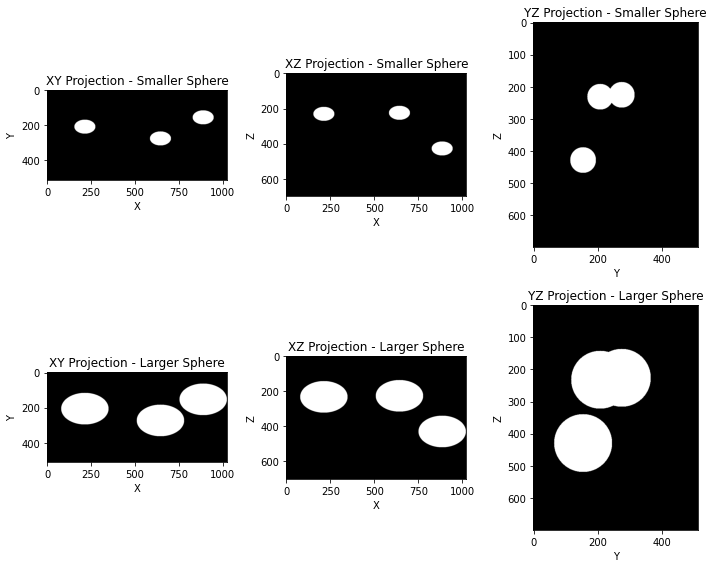

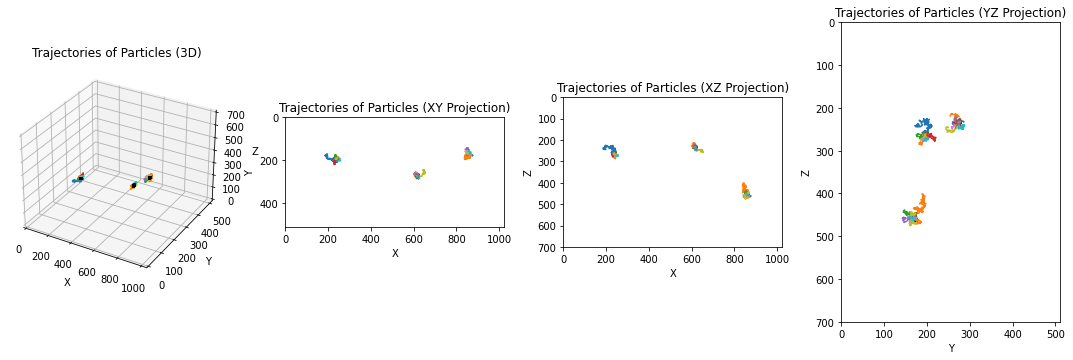

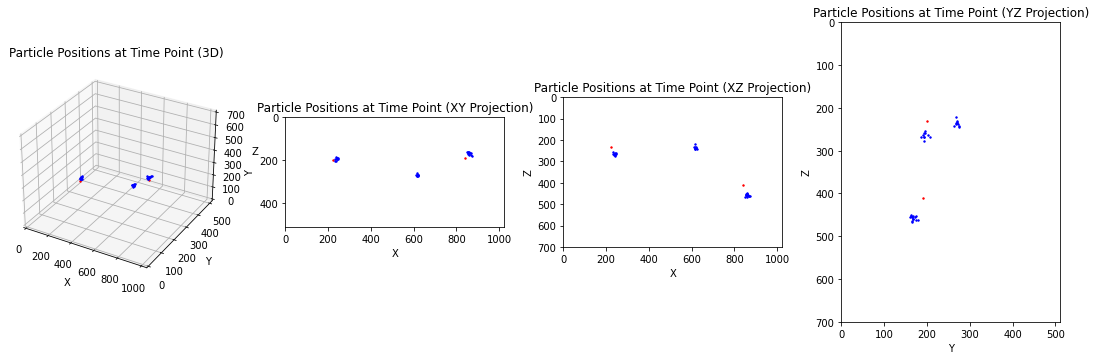

In [95]:
#### Testing 
testing = True
if testing== True:
    # Example usage:
    x_range = (0,512*2)
    y_range = (0,512)
    z_range = (0,700)
    number_frames = 200
    diffusion_coefficient_nucleus = 5  # Single diffusion coefficient for all dimensions
    diffusion_coefficient_cytosol = 7  # Single diffusion coefficient for all dimensions
    max_num_particles_per_ellipsoid = 20
    minor_axis_nucleus = 40
    major_axis_nucleus = 60
    minor_axis_cytosol = int(major_axis_nucleus*1.5)
    major_axis_cytosol = int(minor_axis_cytosol*1.5)   
    num_ellipsoids = 3
    movement_small_to_large = True
    
    df_particles, df_cell_positions, masks_nucleus, masks_cytosol = generate_random_walk_in_ellipsoids(number_frames, 
                                                                                                      diffusion_coefficient_nucleus=diffusion_coefficient_nucleus,
                                                                                                      diffusion_coefficient_cytosol=diffusion_coefficient_cytosol, 
                                                                                                      max_num_particles_per_ellipsoid=max_num_particles_per_ellipsoid, 
                                                                                                      minor_axis_nucleus=minor_axis_nucleus, 
                                                                                                      major_axis_nucleus=major_axis_nucleus, 
                                                                                                      minor_axis_cytosol=minor_axis_cytosol, 
                                                                                                      major_axis_cytosol=major_axis_cytosol,
                                                                                                      num_ellipsoids=num_ellipsoids,
                                                                                                      movement_small_to_large=movement_small_to_large, 
                                                                                                      xyz_size=(x_range[1], y_range[1], z_range[1]))

    # Print particle ranges
    ranges = df_particles.describe().loc[['min', 'max']]
    print(ranges)
    
    # Show the binary masks
    plot_masks_3D(masks_nucleus, masks_cytosol)

    # Plot trajectories
    plot_trajectories(df_particles, plot_type='both', figsize=(15, 5),show_legend=False,x_range=x_range,y_range=y_range,z_range=z_range)

    # Plot particle positions at 2 time points
    plot_particle_positions(df_particles, time_point=5,second_time_point=99, plot_type='both', figsize=(15, 5),show_legend=False,x_range=x_range,y_range=y_range,z_range=z_range)

In [96]:
df_particles[df_particles['Cell_ID']==1]

,Cell_ID,particle,frame,x,y,z,TS_x,TS_y,TS_z,centroid_x,centroid_y,centroid_z,minor_axis_nucleus,major_axis_nucleus,minor_axis_cytosol,major_axis_cytosol
4000,1,0,0,NaN,NaN,NaN,616.972286,272.182222,235.222041,645.463293,275.295366,226.226606,40,60,90,135
4001,1,0,1,NaN,NaN,NaN,616.972286,272.182222,235.222041,645.463293,275.295366,226.226606,40,60,90,135
4002,1,0,2,NaN,NaN,NaN,616.972286,272.182222,235.222041,645.463293,275.295366,226.226606,40,60,90,135
4003,1,0,3,617.181272,272.133379,233.626027,616.972286,272.182222,235.222041,645.463293,275.295366,226.226606,40,60,90,135
4004,1,0,4,620.233665,269.832026,236.326086,616.972286,272.182222,235.222041,645.463293,275.295366,226.226606,40,60,90,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,19,195,NaN,NaN,NaN,616.972286,272.182222,235.222041,645.463293,275.295366,226.226606,40,60,90,135
7996,1,19,196,NaN,NaN,NaN,616.972286,272.182222,235.222041,645.463293,275.295366,226.226606,40,60,90,135
7997,1,19,197,NaN,NaN,NaN,616.972286,272.182222,235.222041,645.463293,275.295366,226.226606,40,60,90,135
7998,1,19,198,NaN,NaN,NaN,616.972286,272.182222,235.222041,645.463293,275.295366,226.226606,40,60,90,135


In [97]:
interact(plot_particle_positions_3D,
         df=fixed(df_particles),  # Use your actual DataFrame
         time_point=IntSlider(min=df_particles['frame'].min(), max=df_particles['frame'].max() , step=1, value=int(df_particles['frame'].max()//2), description='Time Point:', continuous_update=False),
         elev_val=IntSlider(min=-90, max=90, step=5, value=90, description='elevation :', continuous_update=False), # The elevation angle in degrees rotates the camera above the plane pierced by the vertical axis, with a positive angle corresponding to a location above that plane. For example, with the default vertical axis of 'z', the elevation defines the angle of the camera location above the x-y plane. If None, then the initial value as specified in the
         azim_val=IntSlider(min=-90, max=90, step=5, value=-90, description='vertical:', continuous_update=False), # The azimuthal angle in degrees rotates the camera about the vertical axis, with a positive angle corresponding to a right-handed rotation. For example, with the default vertical axis of 'z', a positive azimuth rotates the camera about the origin from its location along the +x axis towards the +y axis.
         figsize=fixed((12, 12)),  # Keep fixed if you don't need to change
         x_range=fixed(x_range),  # Set these or leave as None if you want auto-ranging
         y_range=fixed(y_range),
         z_range=fixed(z_range),
         show_legend=fixed(False),  # Change to True if you want a legend
         output_folder=fixed('temp_plots'),
         create_gif=fixed(False),
         masks_nucleus=fixed(masks_nucleus), 
         masks_cytosol=fixed(masks_cytosol),
         plot_trajectories = fixed(True),
         ax = fixed(None)
        );
# To view planes use:
# Plane   Elevation    Vertical
# XY          90         -90
# XZ           0         -90
# YZ           0           0

# Default       30         -37.5


interactive(children=(IntSlider(value=99, continuous_update=False, description='Time Point:', max=199), Checkb…

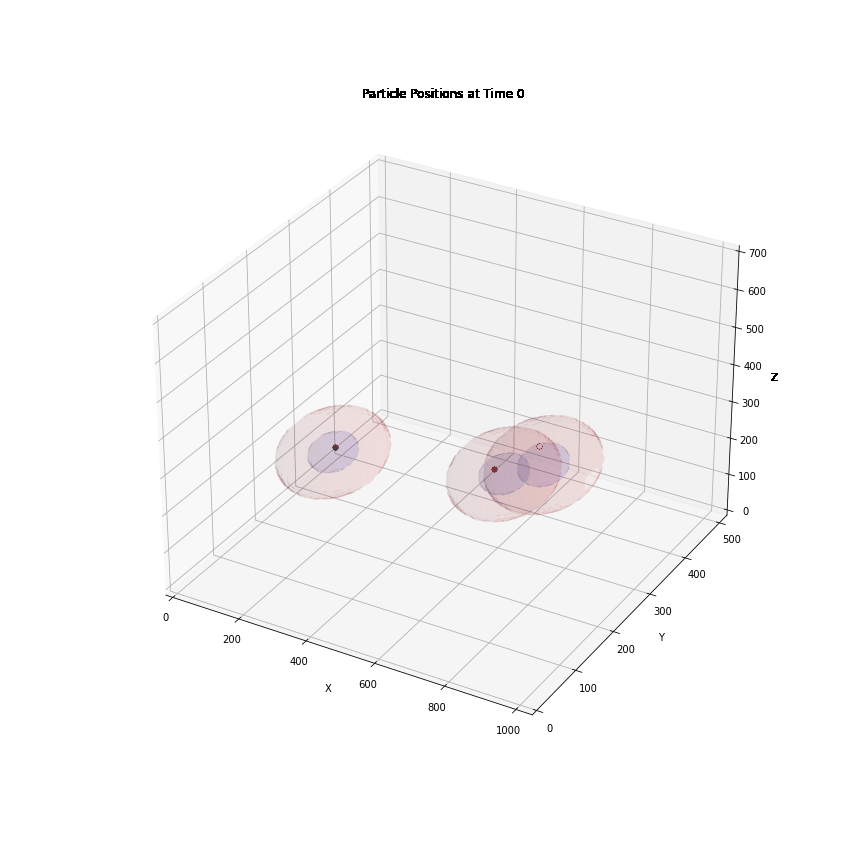

In [98]:
# Generate and display the GIF
gif_image = generate_gif(df_particles,frame_interval=20,x_range=x_range,y_range=y_range,z_range=z_range,masks_nucleus=masks_nucleus, masks_cytosol=masks_cytosol,plot_trajectories=False)
display(gif_image)


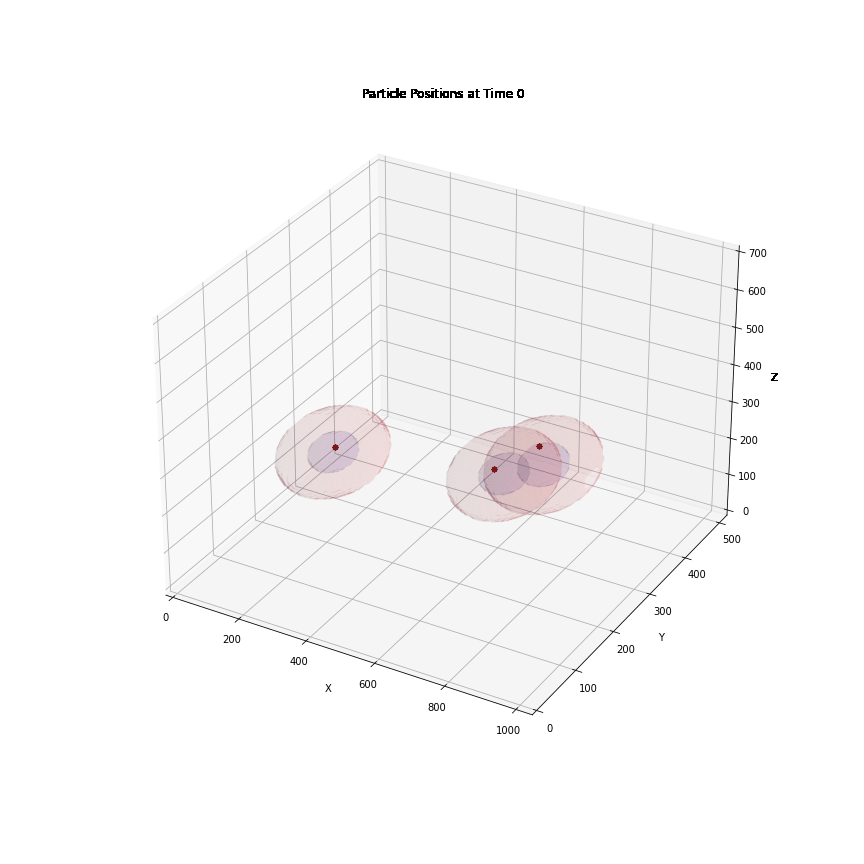

In [99]:
# Generate and display the GIF
gif_image_tr = generate_gif(df_particles,frame_interval=20,x_range=x_range,y_range=y_range,z_range=z_range,masks_nucleus=masks_nucleus, masks_cytosol=masks_cytosol,plot_trajectories=True)
display(gif_image_tr)